<a href="https://colab.research.google.com/github/ntjahjono3/BMEN6367/blob/main/BMEN6367_HW2_3_2_NTjahjono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

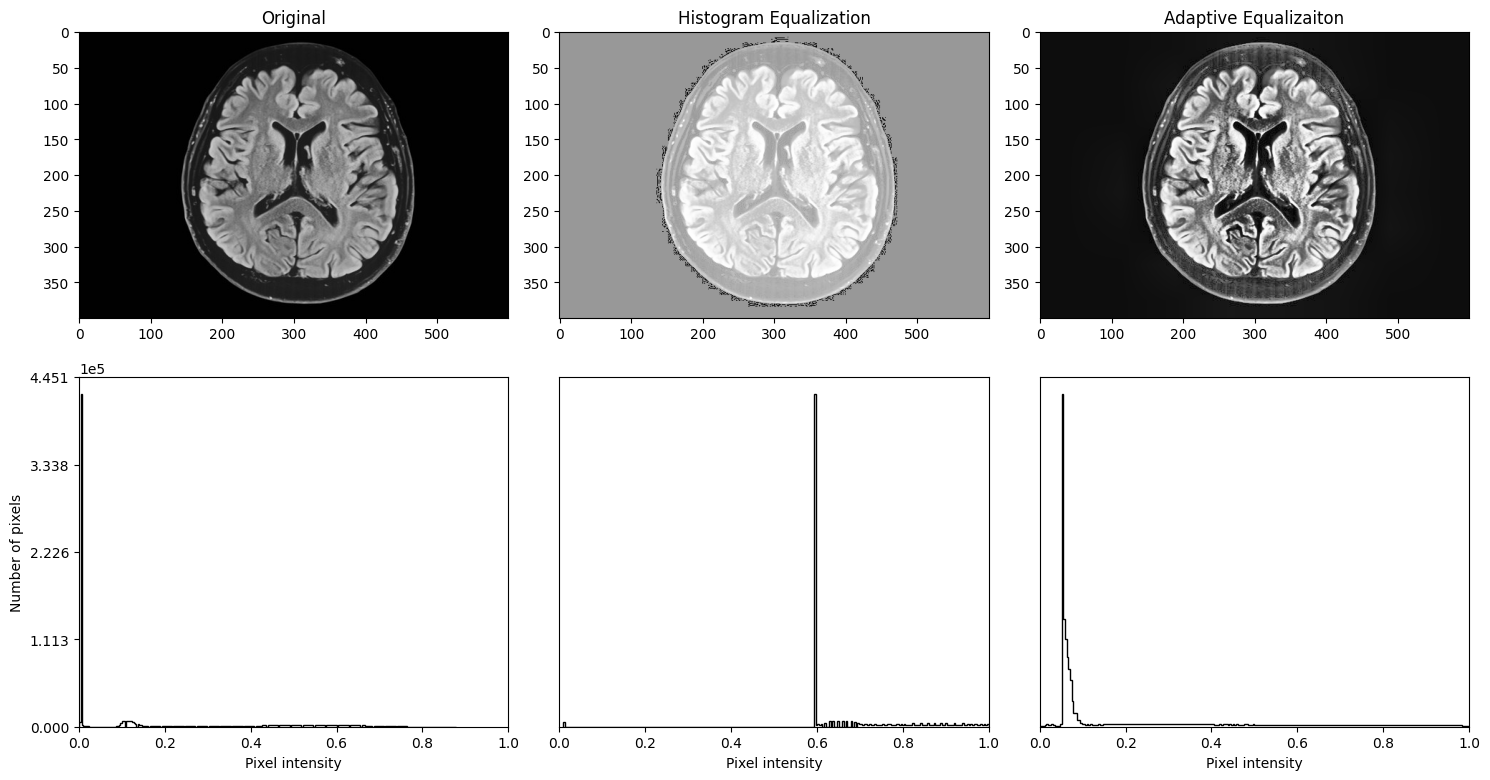

In [20]:
# BMEN 6367 Homework 2
# Nathaniel Tjahjono
# September 4, 2023

import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from scipy import ndimage, datasets
from google.colab import drive

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


# Part 3 - Image processing 2
# Load Brain MRI image
# drive.mount('/content/gdrive')  # Mount my Google Drive
img = cv.imread('/content/gdrive/MyDrive/BMEN6367_HW2_images/MRI_Brain.jpg')  # read Brain MRI from Google Drive

# perform histogram equalizaiton
bins=256    # 256 bins for 256 possible pixel values
# set up figure and subplots
fig, ([ax_img,ax_imgeq,ax_imgadapt],[ax_hist,ax_histeq,ax_histadapt])=plt.subplots(2,3, figsize = (15,8))
# label each column
ax_img.set_title('Original')
ax_imgeq.set_title('Histogram Equalization')
ax_imgadapt.set_title('Adaptive Equalizaiton')

# original image histogram
image1 = img_as_float(img)
ax_hist.hist(image1.ravel(), bins=bins, histtype='step', color='black')     # create histogram from original image
ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))    # format y-axis to best fit data
ax_hist.set_xlabel('Pixel intensity')     # define x-axis label
ax_hist.set_xlim(0, 1)                    # define x-axis limits as ranging from 0 to 1 for simplicity
ax_hist.set_yticks([])                    # generate y-axis ticks automatically
ax_img.imshow(img)                        # show original image

y_min, y_max = ax_hist.get_ylim()         # find min and max y values
ax_hist.set_ylabel('Number of pixels')    # define y-axis label for histograms
ax_hist.set_yticks(np.linspace(0, y_max, 5))  # make 5 ticks for y-axis

# equalized image histogram
img_eq = exposure.equalize_hist(img)      # use exposure from skimage to equalize the histogram
image2 = img_as_float(img_eq)
ax_histeq.hist(image2.ravel(), bins=bins, histtype='step', color='black')   # create histogram from equalized image
ax_histeq.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))  # format y-axis
ax_histeq.set_xlabel('Pixel intensity')   # define x-axis label
ax_histeq.set_xlim(0, 1)                  # define x-axis limits as ranging from 0 to 1 for simplicity
ax_histeq.set_yticks([])                  # generate y-axis ticks automatically
ax_imgeq.imshow(img_eq)                   # show equalized image
# adaptive equalization histogram
img_adapt = exposure.equalize_adapthist(img, clip_limit=0.05)   # use exposure.equalize_adapthist to adaptively equalize histogram
image3 = img_as_float(img_adapt)
ax_histadapt.hist(image3.ravel(),bins=bins,histtype='step',color='black')   # create histogram from equalized image
ax_histadapt.ticklabel_format(axis='y',style='scientific',scilimits=(0,0))  # format y-axis
ax_histadapt.set_xlabel('Pixel intensity')    # define x-axis label
ax_histadapt.set_xlim(0,1)                    # define x-axis limits as ranging from 0 to 1 for simplicity
ax_histadapt.set_yticks([])                   # generate y-axis ticks automatically
ax_imgadapt.imshow(img_adapt)                 # show equalized image

fig.tight_layout()     # plot figure subplots with appropriate padding/spacing
plt.show()